In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
bank_marketing = pd.read_csv(r"C:\Users\mkk76\OneDrive\Documents\GitHub\SCT_DS_03\bank marketing.csv")
bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank_marketing.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
label_encoder = LabelEncoder()
bank_marketing['deposit'] = bank_marketing['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [5]:
bank_marketing_encoded = pd.get_dummies(bank_marketing, drop_first=True)

In [6]:
limited_data = bank_marketing_encoded.sample(n=100, random_state=42)

In [7]:
X = bank_marketing_encoded.drop(columns=['deposit'])
y = bank_marketing_encoded['deposit'] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
Classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
y_pred = Classifier.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1166
           1       0.79      0.78      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



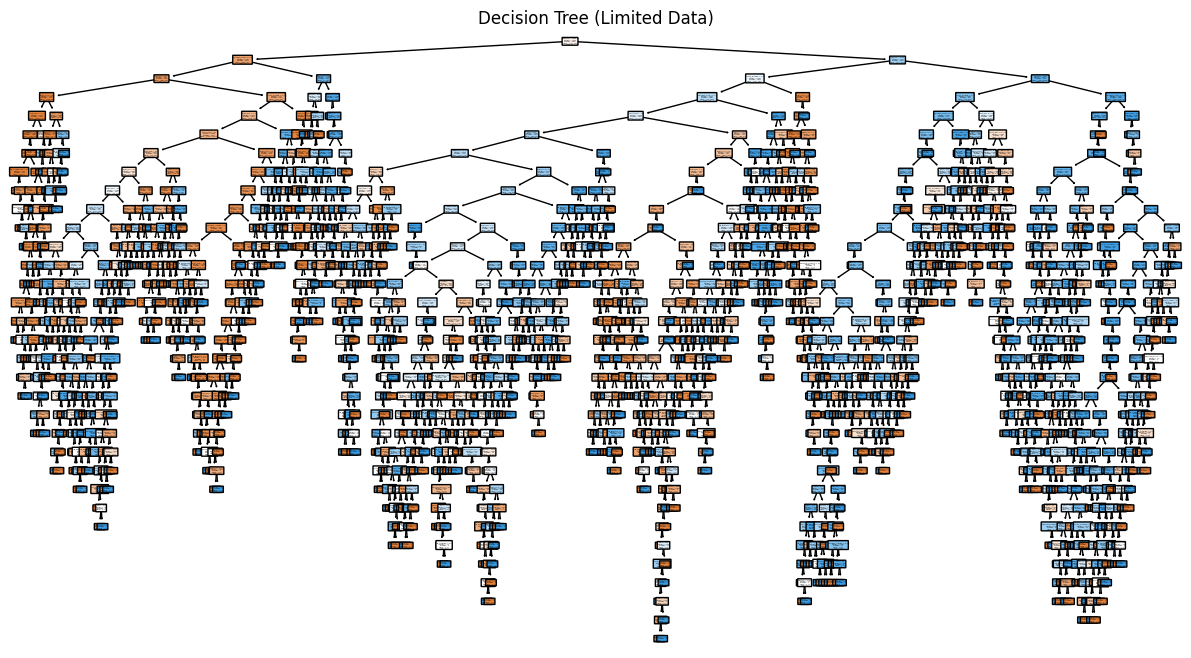

In [12]:
plt.figure(figsize=(15, 8))
plot_tree(Classifier, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree (Limited Data)")
plt.show()